### Pre-trained model or Transfer Learning is a process of training the model not from scratch but by using the previously trained model weights and biases. This will help the model to learn quickly with some preexisting knowledge (initial values of weights and biases)

In [2]:
# In the present model we are going to use the existing model called as VGG-16 which is already in keras library

In [34]:
# Importing the required libraries 
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
import numpy as np
import pandas as pd

In [4]:
pretrained_model = VGG16(weights='imagenet')

In [5]:
# About the model
pretrained_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# The imagenet is the dataset on which the VGG16 is the model trained on it and that is used as the pretraining model now.

In [35]:
# Reading the imagenet json file
imagenet_classes = pd.read_json(r"D:\Data science and AI\Artificial Intelligence\imagenet_class_index.json") 

In [36]:
imagenet_classes = imagenet_classes.T[[1]]

In [38]:
imagenet_classes.columns = ['Class']

In [39]:
imagenet_classes

,Class
0,tench
1,goldfish
2,great_white_shark
3,tiger_shark
4,hammerhead
...,...
995,earthstar
996,hen-of-the-woods
997,bolete
998,ear


In [40]:
# Here are the imagenet 1000 categories of the images of the dataset

### Inference using VGG16

In [21]:
# Loading an image of the one of the categories of the imagenet dataset
hammerhead = load_img(r"D:\Data science and AI\Artificial Intelligence\HammerHeadShark.jpeg",target_size=(224,224))

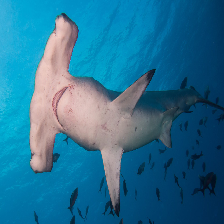

In [22]:
# Let's load a hammerhead shark and test the VGG16 model...........
hammerhead

In [25]:
hammerhead = np.array(hammerhead)

In [26]:
hammerhead.shape

(224, 224, 3)

In [27]:
hammerhead = preprocess_input(hammerhead)

In [29]:
hammerhead.shape

(224, 224, 3)

In [31]:
hammerhead = hammerhead.reshape(1,224,224,3)

In [32]:
preds = pretrained_model.predict(hammerhead)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [33]:
preds.shape

(1, 1000)

In [43]:
imagenet_classes["probability"] = np.round(preds.flatten(),4)
imagenet_classes.sort_values("probability",ascending=False)

,Class,probability
4,hammerhead,0.9839
3,tiger_shark,0.0096
2,great_white_shark,0.0033
5,electric_ray,0.0012
327,starfish,0.0010
...,...,...
344,hippopotamus,0.0000
345,ox,0.0000
346,water_buffalo,0.0000
347,bison,0.0000


### Conclusion: From the pretrained model VGG16, we have predicted that the image that is given is having 98.39% probability of being a Hammerhead shark whiich is correct...